**Projet : Restauration d'image avec l'équation de la chaleur**

Par Omer BOUEKE.

# Introduction

Le but de ce projet est de discrétiser l'équation de la chaleur avec la méthode des différences finies afin d'effectuer du traitement d'image. Il est séparé en deux parties :  
- La partie mathématique : sert à obtenir notre modèle / schéma numérique pour appliquer les transformations sur notre image.  
- La partie informatique : programme le modèle mathématique obtenu et applique cette programmation sur des
exemples.

Le but final est de pouvoir appliquer des corrections à des images, pour la floutter, corriger le bruit ou encore réparer des zones manquantes.

# Partie mathématiques

## Présentation de l'équation de la chaleur

Soit $D := ]0, 1[$. Alors, l'équation de la chaleur pour 2 dimensions spatiales est :

$$
\left\{\begin{array}{l}
 \dfrac{\partial u}{\partial t}(x, y, t)-a\dfrac{\partial^2 u}{\partial x^2}(x, y, t) -a\dfrac{\partial^2 u}{\partial y^2}(x, y, t)= f(x, y, t), \quad \forall~x,~y~\in\ D, \quad \forall~t~\in~[0, T[, \quad a > 0 \\
u(x, y, t) = b \quad \forall~x,~y~\in\ \partial D^2 \quad \text{(condition aux bords)}, \quad b \geq 0 \\
u(x, y, 0) \quad \text{est connu} \quad \forall~x,~y~\in\ D^2 \quad \text{(condition initiale)},
\end{array}\right.
.$$

## Résolution de l'équation avec une méthode approchée

### Discrétisation de l'espace temps et méthode des différences finies

Soit $u_{i,j}^k :\approx u(x_i, y_j, t_k)$, $\Delta_t$ le pas pour $t$, $\Delta_x$ et $\Delta_y$ les pas pour $x$ et $y$. Alors, avec la méthode des différences finies, on approxime chaque terme de l'EDP et on obtient :  
Pour le terme en $t$ :
$$\dfrac{\partial u}{\partial t}(x, y, t) = \dfrac{1}{\Delta_t} \bigg(u_{i,j}^{k+1} - u_{i,j}^k\bigg).$$
Pour les termes en $x$ et en $y$, on utilise les différences finies centrées à l'ordre $2$ :
$$u_{i+1,j} \approx u_{i,j} + \Delta_x \dfrac{\partial u}{\partial x}x_{i,j} + \dfrac{1}{2}\Delta_x^2 \dfrac{\partial ^2u}{\partial x^2}x_{i,j},$$
$$u_{i-1,j} \approx u_{i,j} - \Delta_x \dfrac{\partial u}{\partial x}x_{i,j} + \dfrac{1}{2}\Delta_x^2 \dfrac{\partial ^2u}{\partial x^2}x_{i,j},$$
$$u_{i,j+1} \approx u_{i,j} + \Delta_y \dfrac{\partial u}{\partial y}x_{i,j} + \dfrac{1}{2}\Delta_y^2 \dfrac{\partial ^2u}{\partial y^2}x_{i,j},$$
$$u_{i,j-1} \approx u_{i,j} - \Delta_x \dfrac{\partial u}{\partial y}y_{i,j} + \dfrac{1}{2}\Delta_y^2 \dfrac{\partial ^2u}{\partial y^2}x_{i,j}.$$
En additionnant ces termes, on obtient :
$$u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \approx 4u_{i,j} + \Delta_x^2 \dfrac{\partial ^2u}{\partial x^2}x_{i,j} + \Delta_y^2 \dfrac{\partial ^2u}{\partial y^2}x_{i,j}$$
$$\Leftrightarrow \Delta_x^2 \dfrac{\partial ^2u}{\partial x^2}x_{i,j} + \Delta_y^2 \dfrac{\partial ^2u}{\partial y^2}x_{i,j} \approx u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j}.$$
On suppose que $h := \Delta_x = \Delta_y$, alors :
$$a\bigg(\dfrac{\partial ^2u}{\partial x^2}x_{i,j} + \dfrac{\partial ^2u}{\partial y^2}x_{i,j}\bigg) \approx \dfrac{a}{h^2}\bigg(u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j}\bigg).$$
En injectant ce terme dans l'EDP, on obtient :
$$\boxed{\dfrac{1}{\Delta_t} \bigg(u_{i,j}^{k+1} - u_{i,j}^k\bigg) - \dfrac{a}{h^2}\bigg(u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k - 4u_{i,j}^k\bigg)\approx f_{i,j}^k}.$$

### Schéma de Crank-Nicolson et sa forme matricielle

Pour le schéma de Crank-Nicolson, on prend la moyenne entre $t$ et $t+1$ pour chaque terme et on obtient :
$$\dfrac{1}{\Delta_t} \bigg(u_{i,j}^{k+1} - u_{i,j}^k\bigg) - \dfrac{a}{2h^2} \bigg(u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k - 4u_{i,j}^k\bigg) - \dfrac{a}{2h^2} \bigg( u_{i+1,j}^{k+1} + u_{i-1,j}^{k+1} + u_{i,j+1}^{k+1} + u_{i,j-1}^{k+1} - 4u_{i,j}^{k+1}\bigg)$$
$$\approx \dfrac{1}{2} \bigg(f_{i,j}^k + f_{i,j}^{k+1}\bigg)$$
$$\Leftrightarrow \dfrac{1}{\Delta_t} u_{i,j}^{k+1} - \dfrac{a}{2h^2} \bigg(u_{i+1,j}^{k+1} + u_{i-1,j}^{k+1} + u_{i,j+1}^{k+1} + u_{i,j-1}^{k+1} - 4u_{i,j}^{k+1}\bigg)$$ 
$$\approx \dfrac{1}{\Delta_t} u_{i,j}^k + \dfrac{a}{2h^2} \bigg(u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k - 4u_{i,j}^k\bigg) + \dfrac{1}{2} \bigg(f_{i,j}^k + f_{i,j}^{k+1}\bigg)$$
$$\Leftrightarrow \bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2} \bigg)u_{i,j}^{k+1} - \dfrac{a}{2h^2} \bigg(u_{i+1,j}^{k+1} + u_{i-1,j}^{k+1} + u_{i,j+1}^{k+1} + u_{i,j-1}^{k+1}\bigg)$$ $$\approx \bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2} \bigg) u_{i,j}^k + \dfrac{a}{2h^2} \bigg(u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k\bigg) + \dfrac{1}{2} \bigg(f_{i,j}^k + f_{i,j}^{k+1}\bigg).$$
Soit $U^k := (u_{0,0}^k, ..., u_{N,0}^k, u_{0,1}^k, ..., u_{N,1}^k, ..., u_{0,N}^k, ..., u_{N,N}^k)$ le vecteur de dimensions $(N+1)^2$ qui contient chaque valeurs $u_{i,j}^k$ dans l'ordre de bas en haut et de gauche à droite (c'est notre espace 2D aplati en 1D), avec $U^0$ connu. En passant à la forme matricielle, on obtient :
$$ \bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2} \bigg) U^{k+1} - \dfrac{a}{2h^2} AU^{k+1} \approx \bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2} \bigg) U^k + \dfrac{a}{2h^2} AU^k + F^{k+1/2}$$
$$ \Leftrightarrow \bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2} \bigg) U^{k+1} -\dfrac{a}{2h^2} AU^{k+1} - \bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2} \bigg) U^k - \dfrac{a}{2h^2} AU^k \approx F^{k+1/2}$$
$$ \Leftrightarrow \bigg(\bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2}\bigg)I - \dfrac{a}{2h^2} A \bigg) U^{k+1} - \bigg(\bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2}\bigg)I + \dfrac{a}{2h^2} A\bigg) U^k \approx F^{k+1/2}$$
$$ \Leftrightarrow \bigg(\bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2}\bigg)I -\dfrac{a}{2h^2} A \bigg) U^{k+1} \approx \bigg(\bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2}\bigg)I + \dfrac{a}{2h^2} A\bigg) U^k + F^{k+1/2}$$
$$ \Leftrightarrow U^{k+1} \approx \bigg(\bigg(\dfrac{1}{\Delta_t} + \dfrac{2a}{h^2}\bigg)I -
\dfrac{a}{2h^2} A \bigg)^{-1}\bigg(\bigg(\bigg(\dfrac{1}{\Delta_t} - \dfrac{2a}{h^2}\bigg)I +
\dfrac{a}{2h^2} A\bigg) U^k + F^{k+1/2}\bigg)$$
$$ \Leftrightarrow U^{k+1} \approx (\alpha I - \gamma A)^{-1}\Big((\beta I +\gamma A) U^k + F^{k+1/2}\Big)$$
$$ \Leftrightarrow \boxed{U^{k+1} \approx K^{-1}(LU^k + F^{k+1/2})},$$
avec $$K := \alpha I - \gamma A,$$ $$L := \beta I + \gamma A,$$ $$\alpha := \dfrac{1}{\Delta_t} + \dfrac{2a}{h^2},$$ $$\beta := \dfrac{1}{\Delta_t} - \dfrac{2a}{h^2},$$ $$\gamma := \dfrac{a}{2h^2},$$ $$F^{k+1/2} := \dfrac{1}{2}\bigg(f_{i,j}^k + f_{i,j}^{k+1}\bigg),$$ et où $A$ est la matrice de taille $(N + 1)^2 \times (N + 1)^2$ qui contient les voisins (lorsqu'ils existent) pour $x$ et pour $y$ en chaque point, on la construit lignes par lignes. Pour chaque ligne, le voisin $u_{i+1,j}$ est stocké dans le coefficient à droite, le voisin $u_{i-1,j}$ est stocké dans le coefficient à gauche, le voisin $u_{i,j+1}$ est stocké dans le coefficient décalé de $N$ éléments à droite et le voisin $u_{i,j-1}$ est stocké dans le coefficient décalé de $N$ éléments à gauche.

Exemple avec $N = 2$ :
$$A_{N=2} = \begin{pmatrix}
\textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0}
\end{pmatrix},$$

<!--$$A_{N=3} = \begin{pmatrix}
\textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \cdot & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \cdot & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{blue}{1} & \textcolor{red}{0}
\end{pmatrix}.$$-->

Les coefficients "$\cdot$" sont nuls, pour mieux voir la structure en blocs de ces matrices. On note que la diagonale principe est nulle.

Pour notre partie programmation, nous allons ignorer les conditions aux bords. On remarque que les cases situés aux bords de la discrétisation possèdent moins de voisins, et donc leur température à l'instant suivant sera sous-estimée. Si on programme cette méthode sans corriger cela, les zones proches du bord vont devenir froides au fur et à mesure des itérations. Pour pallier cela, on décide de modifier les coefficients de la matrice qui représentent des cases situés sur un bord :  
- une case $(i, j)$ qui possède 4 voisins ne sera pas modifiée : $A_{i,j} = 1$,  
- une case $(i, j)$ qui possède 3 voisins sera pondérée : $A_{i,j} = 4/3$ (car $3 \cdot 4/3 = 4)$,  
- une case $(i, j)$ qui possède 2 voisins sera pondérée : $A_{i,j} = 2$ (car $2 \cdot 2 = 4).$

Ainsi, notre nouvelle matrice sera, pour $N = 2$:

$$A_{N=2} = \begin{pmatrix}
\textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \cdot \\
\textcolor{blue}{1} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} \\
\cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0}
\end{pmatrix}
\quad \text{devient :} \quad
A_{N=2} = \begin{pmatrix}
\textcolor{red}{0} & \textcolor{blue}{2} & \cdot & \textcolor{blue}{2} & \cdot & \cdot & \cdot & \cdot & \cdot \\
\textcolor{blue}{\frac{4}{3}} & \textcolor{red}{0} & \textcolor{blue}{\frac{4}{3}} & \cdot & \textcolor{blue}{\frac{4}{3}} & \cdot & \cdot & \cdot & \cdot \\
\cdot & \textcolor{blue}{2} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{2} & \cdot & \cdot & \cdot \\
\textcolor{blue}{\frac{4}{3}} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{\frac{4}{3}} & \cdot & \textcolor{blue}{\frac{4}{3}} & \cdot & \cdot \\
\cdot & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \textcolor{red}{0} & \textcolor{blue}{1} & \cdot & \textcolor{blue}{1} & \cdot \\
\cdot & \cdot & \textcolor{blue}{\frac{4}{3}} & \cdot & \textcolor{blue}{\frac{4}{3}} & \textcolor{red}{0} & \cdot & \cdot & \textcolor{blue}{\frac{4}{3}} \\
\cdot & \cdot & \cdot & \textcolor{blue}{2} & \cdot & \cdot & \textcolor{red}{0} & \textcolor{blue}{2} & \cdot \\
\cdot & \cdot & \cdot & \cdot & \textcolor{blue}{\frac{4}{3}} & \cdot & \textcolor{blue}{\frac{4}{3}} & \textcolor{red}{0} & \textcolor{blue}{\frac{4}{3}} \\
\cdot & \cdot & \cdot & \cdot & \cdot & \textcolor{blue}{2} & \cdot & \textcolor{blue}{2} & \textcolor{red}{0}
\end{pmatrix}.$$
Lors de la programmation de cette méthode, nous pourrons visualiser la forme de ces matrices pour différentes tailles.

## Consistance du schéma

On tente de déterminer la consistance et l'ordre du schéma :

D'une part, on a :
$$u_{i,j}^{k+1} = u_{i,j}^k + \Delta_t \dfrac{\partial u_{i,j}^k}{\partial t} + \dfrac{\Delta_t^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial t^2} + O(\Delta_t^3),$$
donc :
$$\boxed{u_{i,j}^{k+1} - u_{i,j}^k = \Delta_t \dfrac{\partial u_{i,j}^k}{\partial t} + \dfrac{\Delta_t^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial t^2} + O(\Delta_t^3)}.$$
D'autre part, on a :
$$u_{i+1,j}^k = u_{i,j}^k + h \dfrac{\partial u_{i,j}^j}{\partial x} + \dfrac{h^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + O(h^3),$$
$$u_{i-1,j}^k = u_{i,j}^k - h \dfrac{\partial u_{i,j}^j}{\partial x} + \dfrac{h^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + O(h^3),$$
donc $$u_{i+1,j}^k + u_{i-1,j}^k - 2u_{i,j}^k = h^2 \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + O(h^3).$$
De même :
$$u_{i,j+1}^k + u_{i,j-1}^k - 2u_{i,j}^k = h^2 \dfrac{\partial ^2u_{i,j}^k}{\partial y^2} + O(h^3).$$
Donc :
$$\boxed{u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k - 4u_{i,j}^k = h^2 \bigg(\dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2}\bigg) + O(h^3)}.$$
D'autre part, on a :
$$u_{i+1,j}^{k+1} = u_{i,j}^k + h \dfrac{\partial u_{i,j}^j}{\partial x} + \dfrac{h^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \Delta_t \dfrac{\partial u_{i,j}^j}{\partial t} + \dfrac{\Delta_t ^2}{2} \dfrac{\partial ^2u_{i,j}^j}{\partial t^2} + O(h^3) + O(\Delta_t^3),$$
$$u_{i-1,j}^{k+1} = u_{i,j}^k - h \dfrac{\partial u_{i,j}^j}{\partial x} + \dfrac{h^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \Delta_t \dfrac{\partial u_{i,j}^j}{\partial t} + \dfrac{\Delta_t ^2}{2} \dfrac{\partial ^2u_{i,j}^j}{\partial t^2} + O(h^3) + O(\Delta_t^3),$$
donc $$u_{i+1,j}^{k+1} + u_{i-1,j}^{k+1} - 2u_{i,j}^{k+1} = h^2 \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + O(h^3) + O(\Delta_t^3).$$
De même :
$$u_{i,j+1}^{k+1} + u_{i,j-1}^{k+1} - 2u_{i,j}^{k+1} = h^2 \dfrac{\partial ^2u_{i,j}^k}{\partial y^2} + O(h^3) + O(\Delta_t^3).$$
Donc :
$$\boxed{u_{i+1,j}^{k+1} + u_{i-1,j}^{k+1} + u_{i,j+1}^{k+1} + u_{i,j-1}^{k+1} - 4u_{i,j}^{k+1} = h^2 \bigg( \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2}\bigg) + O(h^3) + O(\Delta_t^3)}.$$
En injectant ces termes dans le schéma, on obtient :
<!-- $$\dfrac{1}{\Delta_t} \bigg(\Delta_t \dfrac{\partial u_{i,j}^k}{\partial t} + \dfrac{\Delta_t^2}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial t^2} + O(\Delta_t^3)\bigg) - \dfrac{a}{2h^2} \bigg(h^2 \bigg(\dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2}\bigg) + O(h^3)\bigg) - \dfrac{a}{2h^2} \bigg(h^2 \bigg( \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2}\bigg) + O(h^3) + O(\Delta_t^3)\bigg) \approx 0$$ -->
$$\dfrac{\partial u_{i,j}^k}{\partial t} + \dfrac{\Delta_t}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial t^2} + O(\Delta_t^2) - \dfrac{a}{2} \bigg(\dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2} + O(h)\bigg) - \dfrac{a}{2} \bigg(\dfrac{\partial ^2u_{i,j}^k}{\partial x^2} + \dfrac{\partial ^2u_{i,j}^k}{\partial y^2} + O(h) + \dfrac{1}{h^2} O(\Delta_t^3)\bigg) \approx 0$$
$$\Leftrightarrow \dfrac{\partial u_{i,j}^k}{\partial t} + \dfrac{\Delta_t}{2} \dfrac{\partial ^2u_{i,j}^k}{\partial t^2} + O(\Delta_t^2) - a \dfrac{\partial ^2u_{i,j}^k}{\partial x^2} -a \dfrac{\partial ^2u_{i,j}^k}{\partial y^2} - a O(h) - \dfrac{a}{2h^2} O(\Delta_t^3) \approx 0.$$
L'ordre du schéma semble être de $1$ en temps et $1$ en espace. Le schéma de Crank-Nicolson est habituellement d'ordre $2$ en temps et $2$ en espace, il y a ici peut-être une erreur de méthodologie pour déterminer l'ordre...

## Stabilité du schéma

Le schéma de Crank-Nicolson est semi-implicite, il est donc inconditionnellement stable.

# Partie informatique

## Programmation de la méthode

On importe les modules nécessaire à la programmation de cette méthode :

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from numba import jit, njit
from scipy.sparse import eye, lil_matrix, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve, splu
from scipy.linalg import blas

Pour programmer cette méthode, nous avons besoin de faire les fonctions suivantes qui permettent :  
- de construire les matrices $A$, $K$ et $L$ que nous avons définies,  
- de calculer la valeur approchée grâce au schéma et aux matrices à l'instant $k+1$ de chaque $(i, j)$ en connaissant les valeurs à l'instant $k$ de chaque $(i, j)$  
- d'effectuer ce traitement un certain nombre de fois, en choissisant les paramètres $\Delta_t$, $h$, $a$, le nombre d'itérations et d'autres paramètres d'affichage.

### Fonctions pour construire et visualiser les matrices

On écrit une fonction qui permet de construire les matrices $A$, $K$ et $L$ :

In [27]:
def construire_matrices(N : int, delta_t : float, h : float, a : float) -> tuple[csr_matrix]:
    '''Construit les matrices A, K et L'''

    # Construction de A

    N += 1
    A = lil_matrix((N ** 2, N ** 2))
    coeff_voisins = {4 : 1, 3 : 4 / 3, 2 : 2}

    for i in range(N ** 2):

        # Compter le nombre de voisins existants

        nb_voisins = 0
        if i % N != 0:
            nb_voisins += 1
        if (i + 1) % N != 0:
            nb_voisins += 1
        if i - N >= 0:
            nb_voisins += 1
        if i + N < N ** 2:
            nb_voisins += 1

        # Pour chaque voisin existant, attribuer le coefficient en fonction du nombre de voisins existants
        
        if i % N != 0:
            A[i, i - 1] = coeff_voisins[nb_voisins]
        if (i + 1) % N != 0:
            A[i, i + 1] = coeff_voisins[nb_voisins]
        if i - N >= 0:
            A[i, i - N] = coeff_voisins[nb_voisins]
        if i + N < N ** 2:
            A[i, i + N] = coeff_voisins[nb_voisins]

    A = A.tocsr()

    # Construction de K et de L

    alpha = 1 / delta_t + (2 * a) / (h ** 2)
    beta = 1 / delta_t - (2 * a) / (h ** 2)
    gamma = a / (2 * h ** 2)

    idt = eye(N ** 2)
    gamma_fois_A = gamma * A

    K = alpha * idt - gamma_fois_A
    L = beta * idt + gamma_fois_A

    K = K.tocsc()
    L = L.tocsr()

    return A, K, L

Commentaire :   
- Comme $A$, $K$ et $L$ sont des matrices creuses, on utilise la méthode ```tocsr``` du module ```scipy``` pour améliorer les performances et le stockage. Cela améliore grandement la vitesse de calcul de $K^{-1}$.

Pour visualiser la forme creuse de la matrice $A$, on regarde la forme de la matrice avec un graphique. On écrit une fonction (qui n'aura pas d'utilité pour la simulation) pour obtenir cette visualisation :

In [31]:
def afficher_structure_matrices(N : int, delta_t : float, h : float, a : float, dim_graph : tuple[int]) -> None:
    '''Affiche les structures de A, K et L'''

    longueur, largeur = dim_graph
    
    A, K, L = construire_matrices(N, delta_t, h, a)
    A = A.toarray()
    K = K.toarray()
    L = L.toarray()
    
    plt.figure(figsize = (longueur, largeur))

    # Afficher la structure de la matrice A
    
    plt.subplot(1, 3, 1)
    plt.imshow(A, cmap = 'viridis', vmin = -5, vmax = 5)
    plt.title('Forme de A pour N = ' + str(N))
    nb_lig, nb_col = A.shape
    if N < 6:
        for i in range (nb_col):
            for j in range (nb_lig):
                valeur = round(A[i, j], 1)
                if N < 3:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 10, 
                             color = 'white' if valeur > 0 else 'black')
                else:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 6, 
                             color = 'white' if valeur > 0 else 'black')

    # Afficher la structure de la matrice K
    
    plt.subplot(1, 3, 2)
    plt.imshow(K, cmap = 'viridis', vmin = -5, vmax = 5)
    plt.title('Forme de K pour N = ' + str(N))
    if N < 6:
        for i in range (nb_col):
            for j in range (nb_lig):
                valeur = round(K[i, j], 1)
                if N < 3:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 10, 
                             color = 'white' if valeur > 0 else 'black')
                else:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 6, 
                             color = 'white' if valeur > 0 else 'black')

    # Afficher la structure de la matrice L
    
    plt.subplot(1, 3, 3)
    plt.imshow(L, cmap = 'viridis', vmin = -5, vmax = 5)
    plt.title('Forme de L pour N = ' + str(N))
    if N < 6:
        for i in range (nb_col):
            for j in range (nb_lig):
                valeur = round(L[i, j], 1)
                if N < 3:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 10, 
                             color = 'white' if valeur > 0 else 'black')
                else:
                    plt.text(j, i, f'{valeur:.1f}', ha = 'center', va = 'center', fontsize = 6, 
                             color = 'white' if valeur > 0 else 'black')
    
    plt.tight_layout()
    plt.show()

    return None

On teste notre fonction pour voir la forme des matrices pour $N = 2$, $N = 3$ et $N = 8$ :

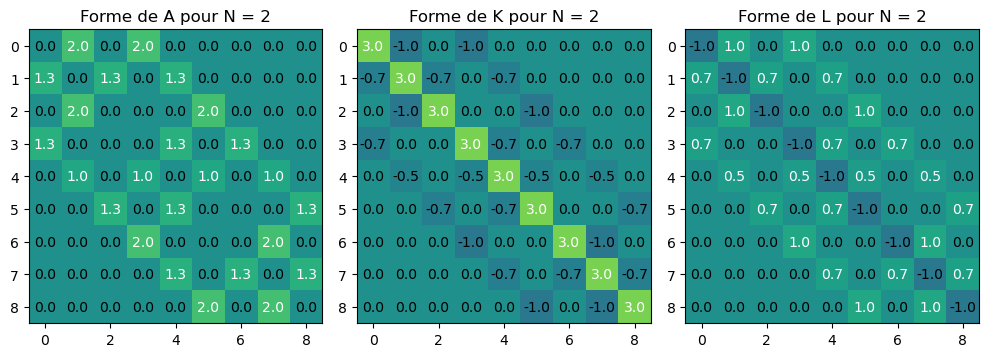

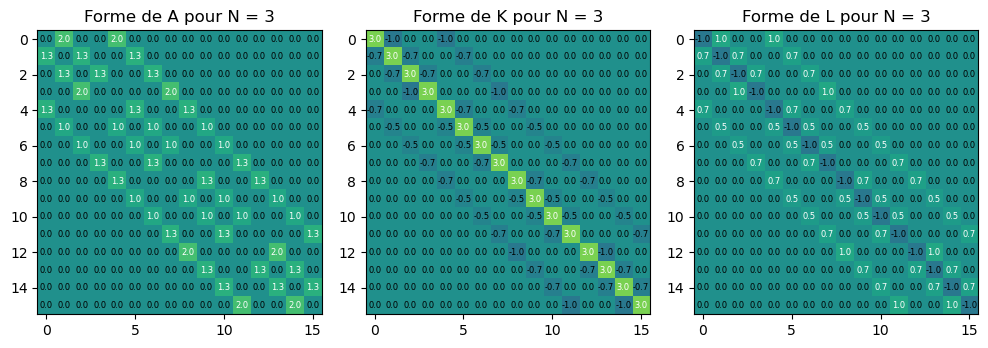

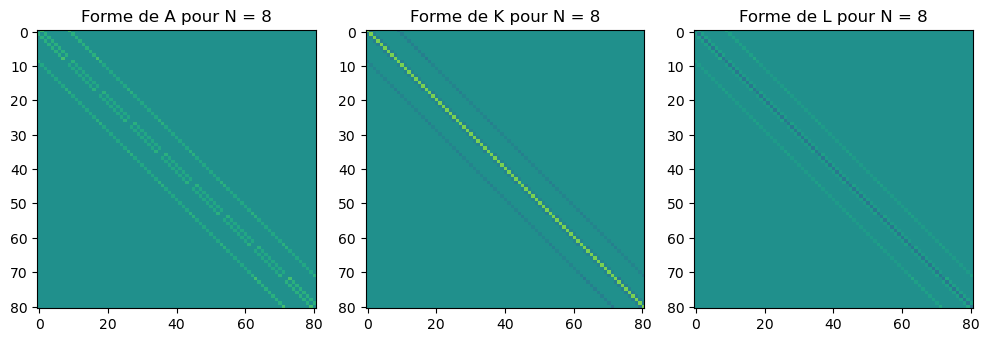

In [34]:
afficher_structure_matrices(2, 1, 1, 1, (10, 4))
afficher_structure_matrices(3, 1, 1, 1, (10, 4))
afficher_structure_matrices(8, 1, 1, 1, (10, 4))

Ces matrices sont bien creuses, on le voit d'autant plus que $N$ devient élevé.

Comme nous allons avoir besoin de résoudre un système linaire avec $K$, on va factoriser $K$. On écrit cette fonction, qui utilise LAPACK :

In [37]:
def calculer_inverse_K(K : csc_matrix) -> csc_matrix:
    '''Fait une factorisation LU de K'''
    
    K_factLU = splu(K)
    
    return K_factLU

Commentaires :  
- On utilise une factorisation "LU" (Lower Upper) pour calculer ultérieurement la solution du système linéaire, ce qui permet d'améliorer la vitesse de calcul.  
- On aurait pu utiliser une autre méthode pour accélérer la vitesse de la résolution du système linéaire $U^{k+1} = K^{-1}(LU^k + F^{k+1/2})$, mais il aurait fallu l'appliquer à chaque itération. En factorisant $K$, on ne le fait qu'une fois.

### Fonction pour calculer le maillage à l'instant suivant

On écrit une fonction qui permet d'appliquer le schéma matriciel que nous avons trouvé précédemment pour trouver chaque $u_{i,j}$ à l'instant $k + 1$ en connaissant chaque $u_{i,j}$ à l'instant $k$ en fonction des paramètres :

In [41]:
def calculer_suivant(U_k : np.ndarray, K_factLU : csc_matrix, L : csr_matrix, F : np.ndarray) -> np.ndarray:
    '''Calcule U_{k+1} en fonction de U_k'''

    U_k_suiv = K_factLU.solve(L @ U_k + F)

    return U_k_suiv

### Fonction pour faire la simulation

On écrit une fonction qui permet d'avoir chaque $u_{i,j}$ (et le graphique correspondant à l'image) à partir de $u_{i,j}^0$ et des autres conditions :

In [44]:
def simuler(U_0 : np.ndarray, N : int, k : int, delta_t : float, h : float, F : np.ndarray, a : float, couleur : str, lst_itr : list[int], dim_graph : tuple[int]) -> None:
    '''Fait la simulation complète'''

    longueur, largeur = dim_graph
    A, K, L = construire_matrices(N, delta_t, h, a)
    K_factLU = calculer_inverse_K(K)
    
    for i in range (k + 1):

        if i in lst_itr:
            U_0_2D = U_0.reshape(N + 1, N + 1)
            plt.figure(figsize = (longueur, largeur))
            plt.imshow(U_0_2D, cmap = couleur, vmin = 0, vmax = 255)
            plt.title("Tableau pour l'itération " + str(i))
            plt.show()
        
        U_1 = calculer_suivant(U_0, K_factLU, L, F)
        U_0 = U_1

    return None

Commentaire : les paramètres sont les suivants :  
- ```U_0``` est $U_0$,  
- ```N``` est $N$,  
- ```k``` est le nombre d'itérations,  
- ```delta_t```, ```h```, ```F``` et ```a``` sont $\Delta_t$, $h$, $F^{k+1/2}$ et $a$,  
- ```couleur``` est le type d'échelle de couleur choisie pour le graphique,  
- ```lst_itr``` est une liste qui contient les itérations que l'on souhaite afficher,  
- ```dim_graph``` est la dimension en longueur et en largeur du graphique que l'on veut afficher.

## Applications de la méthode

Pour la suite, on considère que $F = 0$, $\Delta_t = 0,001$ et $h = 0,1$.

In [51]:
delta_t = 0.001
h = 0.1

### Diffusion de la chaleur

Avant de voir l'exemple du traitement d'image, on peut appliquer l'équation de la chaleur à un espace 2D où chaque point est caractérisé par une chaleur. Cela permet de voir que notre modèle fonctionne correctement et donne un bon comportement au fur et à mesure des itérations. Comme la chaleur le ferait en condition réelle, elle doit se mélanger et donner un espace de chaleur uniforme.

#### Conditions initiales hétérogènes

On définit un tableau de chaleur comme condition initiale, où en chaque point, la chaleur est déterminée aléatoirement. Pour visualiser cela, on repasse notre tableau en 2D et on affiche son contenu avec un graphique, où la couleur représente la valeur de la chaleur.

Taille de l'image = 64 * 64


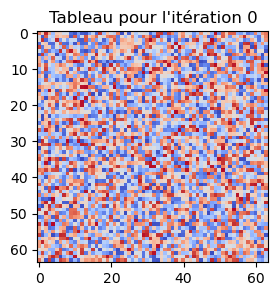

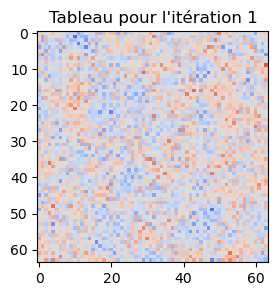

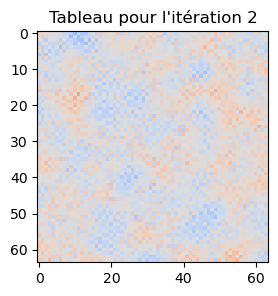

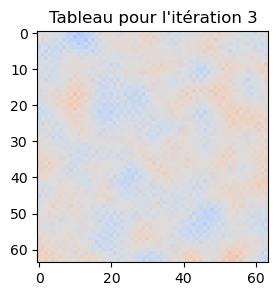

In [58]:
t = 64 # Taille du tableau 2D
s = t ** 2 # Taille du tableau 2D aplati
itr = 4 # Nombre d'itérations
F = np.zeros(s) # F
a = 10 # a
U_0 = np.random.randint(0, 255, s)
print("Taille de l'image =", t, "*", t)
simuler(U_0, t - 1, itr, delta_t, h, F, a, 'coolwarm', [i for i in range (4)], (3, 3))

Après quelques itérations, on voit que la grille devient plus uniforme, avec une température qui tend à devenir $127$ (le milieu de l'intervalle $[0, 255]$) en chaque point.

#### Conditions initiales particulières

On peut voir ce que cela donne sur un espace 2D où la température est de $0$ en chaque point, sauf pour des zones que l'on définit comme chaudes :

--------------------------------------------------
Simulation pour une zone chaude au centre
--------------------------------------------------


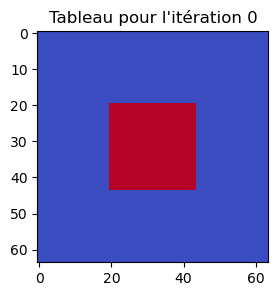

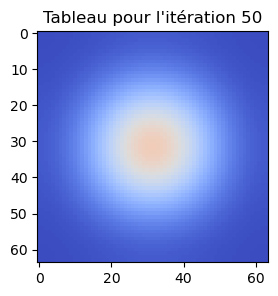

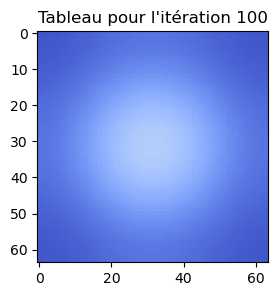

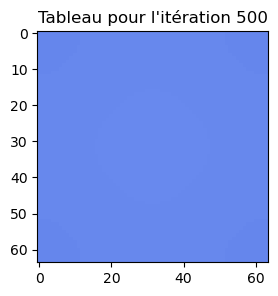

--------------------------------------------------
Simulation pour une zone chaude dans la moitié supérieur
--------------------------------------------------


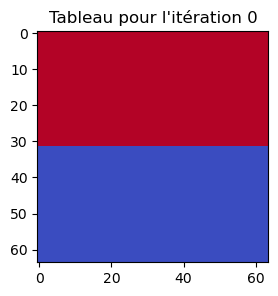

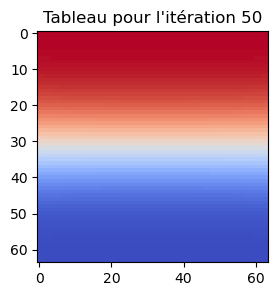

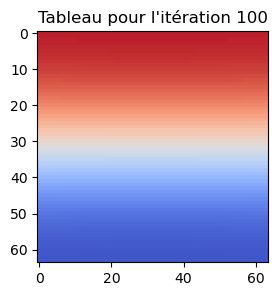

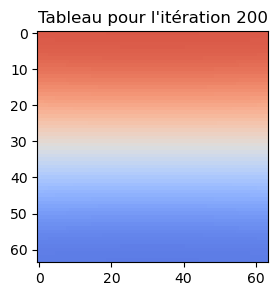

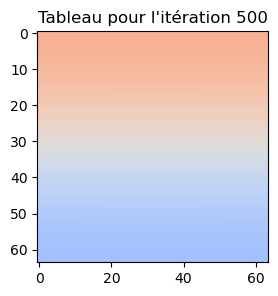

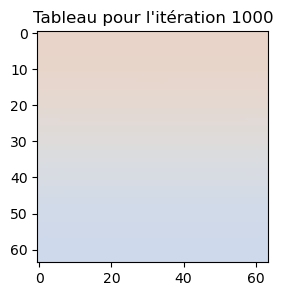

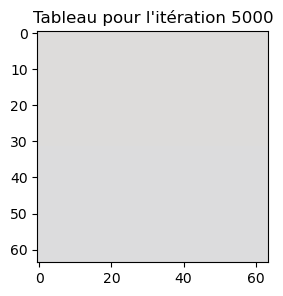

--------------------------------------------------
Simulation pour plusieurs zones chaudes
--------------------------------------------------


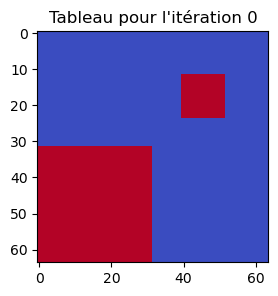

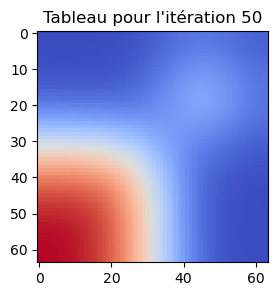

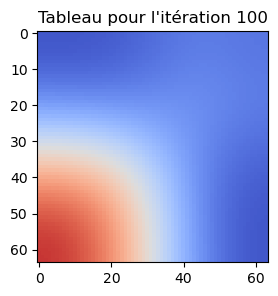

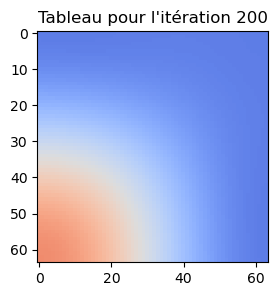

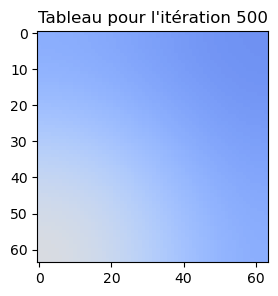

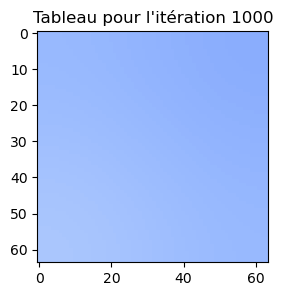

In [63]:
t = 64
s = t ** 2
itr = 5000
b = 0
F = np.zeros(s)
U_0 = 0 * np.ones(s)
sep = 50 * '-'

# Création d'une zone chaude au centre

taille_zone_chaude = 24
U_0_2D = np.zeros((t, t), dtype = int)
centre = t // 2
debut = centre - taille_zone_chaude // 2
fin = centre + taille_zone_chaude // 2
U_0_2D[debut:fin, debut:fin] = 255
U_0 = U_0_2D.flatten()

print(sep + "\nSimulation pour une zone chaude au centre\n" + sep)
simuler(U_0, t - 1, 500, delta_t, h, F, 10, 'coolwarm', [0, 50, 100, 500], (3, 3))

# Création d'une zone chaude dans la moitié supérieur

U_0_2D = np.zeros((t, t), dtype = int)
for i in range (32):
    for j in range (64):
        U_0_2D[i, j] = 255
U_0 = U_0_2D.flatten()

print(sep + "\nSimulation pour une zone chaude dans la moitié supérieur\n" + sep)
simuler(U_0, t - 1, 5000, delta_t, h, F, 10, 'coolwarm', [0, 50, 100, 200, 500, 1000, 5000], (3, 3))

# Création de plusieurs zones chaudes

U_0_2D = np.zeros((t, t), dtype = int)
for i in range (32, 64):
    for j in range (32):
        U_0_2D[i, j] = 255
for i in range (12, 24):
    for j in range (40, 52):
        U_0_2D[i, j] = 255
U_0 = U_0_2D.flatten()

print(sep + "\nSimulation pour plusieurs zones chaudes\n" + sep)
simuler(U_0, t - 1, 5000, delta_t, h, F, 10, 'coolwarm', [0, 50, 100, 200, 500, 1000], (3, 3))

### Traitement d'image

Pour traiter des images, on utilise l'équation de la chaleur en 2 dimensions. Ce traitement peut servir à corriger des zones endommagées de l'image. Les zones endommagés de l'image seront corrigées en fonction de l'intensité des pixels de leur voisins. Ici, $t$ est le nombre d'itérations que l'on veut appliquer à l'image. $U_0$ est l'image de base non corrigée, c'est notre condition initiale. Le paramètre $a$ sert à choisir la manière dont est diffusé la correction.

On importe le module nécessaire pour ouvrir une image :

In [67]:
from PIL import Image

#### Réduction de bruit et flou

On écrit une fonction qui permet d'effectuer et d'afficher le traitement (grâce à la
fonction ```simuler```) :

In [70]:
def afficher_traitement(fichier : str, itr : int, delta_t : float, h : float, a : float, affichage_itr : list[int], affichage_graph : tuple[int]) -> None:
    '''Affiche le traitement de l'image version 2'''
    
    image = Image.open(fichier)
    image = image.convert('L')
    image_array = np.array(image)
    sq = image_array.shape[0]
    U_0 = image_array.reshape(-1) # permet de convertir une image initialement sous forme de tableau 2D en un tableau 1D (aplatir l'image).
    
    affichage_text = "Nom du fichier à traiter : " + str(fichier)
    affichage_text += "\nTaille de l'image 2D = " + str(sq) + " * " + str(sq)
    affichage_text += "\nTaille de U_0 (image aplatie) = " + str(len(U_0))
    print(affichage_text)
    
    F = np.zeros(len(U_0))
    
    simuler(U_0, sq - 1, itr, delta_t, h, F, a, 'gray', affichage_itr, affichage_graph)

    return None

Nom du fichier à traiter : ./image_test.png
Taille de l'image 2D = 512 * 512
Taille de U_0 (image aplatie) = 262144


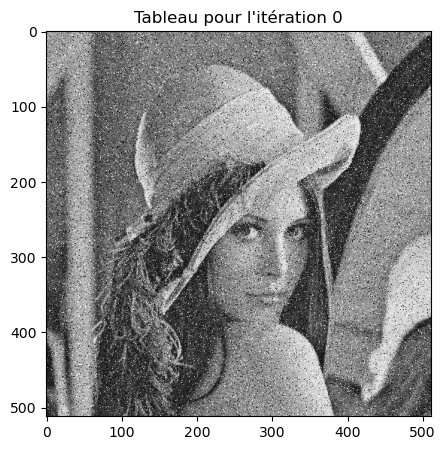

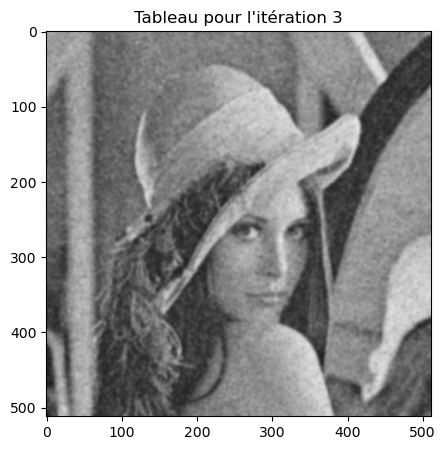

Nom du fichier à traiter : ./image_test2.jpg
Taille de l'image 2D = 400 * 400
Taille de U_0 (image aplatie) = 160000


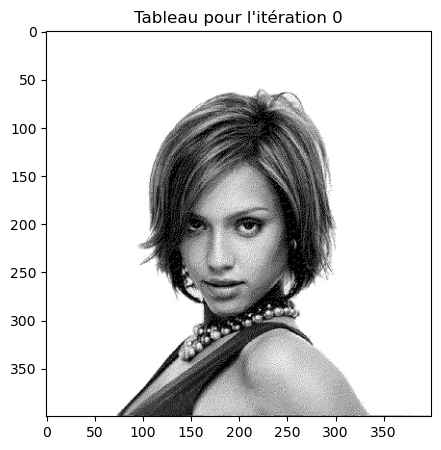

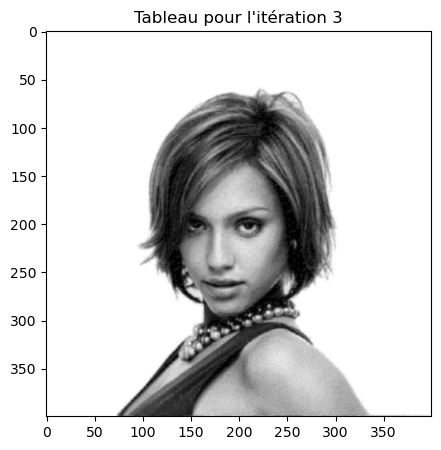

Nom du fichier à traiter : ./image_test3.png
Taille de l'image 2D = 600 * 600
Taille de U_0 (image aplatie) = 360000


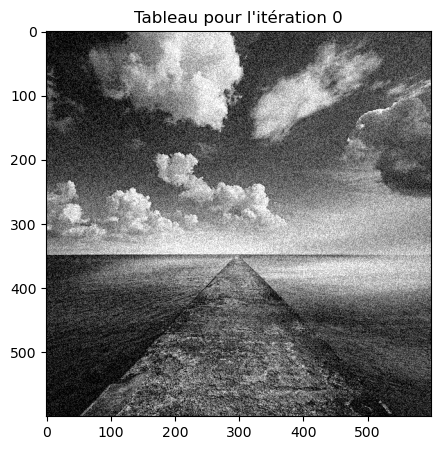

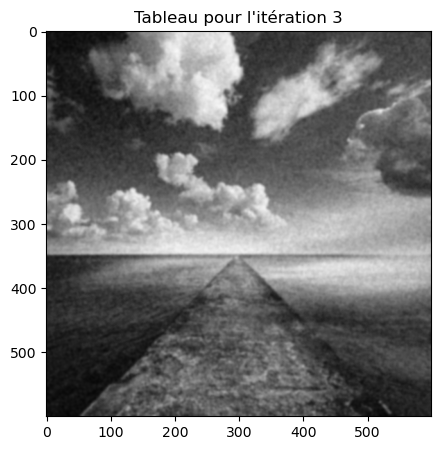

In [72]:
afficher_traitement('./image_test.png', 3, delta_t, h, 5, [0, 3], (5, 5))
afficher_traitement('./image_test2.jpg', 3, delta_t, h, 1, [0, 3], (5, 5))
afficher_traitement('./image_test3.png', 3, delta_t, h, 5, [0, 3], (5, 5))

#### Réparer des zones manquantes

Si on applique le traitement qu'offre notre schéma à toute l'image, cela va avoir tendance à la floutter. Dans certaines images, il y a des zones manquantes que l'on voudrait traiter, sans vouloir affecter les zones correctes. Il faut donc sélectionner la partie de l'image que l'on souhaite traiter.

Pour voir le problème, on suppose une image claire de $3 \times 3$ pixels, avec le pixel du centre inconnu, on le définit égal à $0$. Regardons ce qu'il se passe :

Taille de l'image = 3 * 3


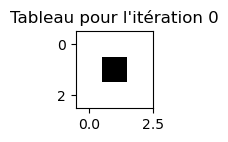

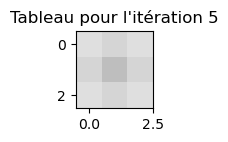

In [76]:
t = 3
s = t ** 2
itr = 5
F = np.zeros(s)
a = 1
U_0 = 255 * np.ones(s)
U_0[4] = 0
print("Taille de l'image =", t, "*", t)
simuler(U_0, t - 1, itr, delta_t, h, F, a, 'gray', [0, 5], (1, 1))

On voit que le pixel du milieu tend à devenir la moyenne de ses voisins, mais tout les autres pixels sont affectés alors qu'on ne veut que réparer la zone manquante. Pour résoudre ce problème, on reécrit la fonction ```simuler``` pour ajouter un argument ```lst_trait``` qui contient la liste des éléments que l'on veut traiter et un traitement modifié pour traiter uniquement les pixels choisis. On écrit la fonction ```masque``` qui permet, à chaque itération, de :  
- revenir à la même valeur du pixel de l'itération précédente (et donc annuler le traitement) pour un élément qui n'est pas dans ```lst_trait```  
- ne rien faire (et donc laisser le traitement) pour un élément qui est dans ```lst_trait```.

In [78]:
@njit
def masque(U_k_suiv : np.ndarray, U_k : np.ndarray, lst_trait : list[int]) -> np.ndarray:
    '''Applique la correction pour traiter uniquement les pixels souhaités'''

    for i in range(len(U_k)):
        if i not in lst_trait:
            U_k_suiv[i] = U_k[i]

    return U_k_suiv

Commentaire :  
- On utilise ```@njit``` de NUMBA qui permet d'améliorer la vitesse de calcul.

In [80]:
def simuler_v2(U_0 : np.ndarray, N : int, k : int, delta_t : float, h : float, F : np.ndarray, a : float, lst_trait : list[int], couleur : str, lst_itr : list[int], dim_graph : tuple[int]) -> None:
    '''Fait la simulation complète version 2'''

    longueur, largeur = dim_graph
    A, K, L = construire_matrices(N, delta_t, h, a)
    K_factLU = calculer_inverse_K(K)
    
    for i in range (k + 1):

        if i in lst_itr:
            U_0_2D = U_0.reshape(N + 1, N + 1) # On retransforme l'image aplatie en 2D pour affichage.
            plt.figure(figsize = (longueur, largeur))
            plt.imshow(U_0_2D, cmap = couleur, vmin = 0, vmax = 255) #Affiche l'image sous forme de matrice en niveaux de gris.
            plt.title("Tableau pour l'itération " + str(i))
            plt.show()
        
        U_1 = calculer_suivant(U_0, K_factLU, L, F)
        U_1 = masque(U_1, U_0, lst_trait)
        U_0 = U_1 # Mise à jour 
        # À chaque itération, U0U0​ est mis à jour avec les valeurs de U1U1​ pour servir d'état de départ à l'itération suivante.

    return None

In [82]:
t = 3
s = t ** 2
itr = 500
F = np.zeros(s)
a = 1
U_0 = 255 * np.ones(s)
U_0[4] = 0
idx_U_0 = [i for i in range (len(U_0))]
print("Taille de l'image =", t, "*", t)
print(F)

Taille de l'image = 3 * 3
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


Si on teste la fonction en utilisant tout les pixels, c'est-à-dire comme avant, alors on obtient :

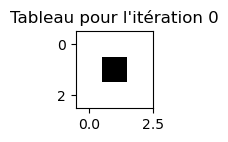

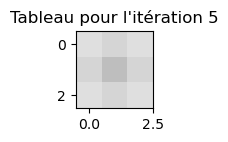

In [84]:
simuler_v2(U_0, t - 1, itr, delta_t, h, F, a, idx_U_0, 'gray', [0, 5], (1, 1))

On obtient donc la même chose.

Si on teste la fonction en choisissant uniquement le pixel à l'indice ```4``` (correspondant au pixel du centre), alors on obtient :

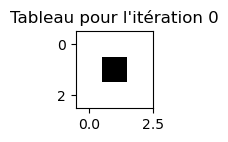

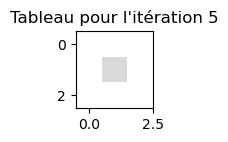

In [87]:
simuler_v2(U_0, t - 1, itr, delta_t, h, F, a, [4], 'gray', [0, 5], (1, 1))

On voit que les pixels qui ne sont pas dans la liste n'ont pas été modifiés, et seul le pixel du centre à été traité pour tendre vers la moyenne de ses voisins.

Appliquons cela à un exemple plus concrêt. On reécrit la fonction ```afficher_traitement``` pour qu'elle prenne en compte la version 2 de ```simulation```:

In [93]:
def afficher_traitement_v2(fichier : str, itr : int, delta_t : float, h : float, a : float, lst_trait : list[int], affichage_itr : list[int], affichage_graph : tuple[int]) -> None:
    '''Affiche le traitement de l'image version 2'''
    
    image = Image.open(fichier)
    image = image.convert('L')
    image_array = np.array(image)
    sq = image_array.shape[0]
    U_0 = image_array.reshape(-1)
    
    affichage_text = "Nom du fichier à traiter : " + str(fichier)
    affichage_text += "\nTaille de l'image 2D = " + str(sq) + " * " + str(sq)
    affichage_text += "\nTaille de U_0 (image aplatie) = " + str(len(U_0))
    print(affichage_text)
    
    F = np.zeros(len(U_0))
    
    simuler_v2(U_0, sq - 1, itr, delta_t, h, F, a, lst_trait, 'gray', affichage_itr, affichage_graph)

    return None

On écrit une fonction pour choisir plus facilement quelles zones l'on souhaite traiter :

In [95]:
def indices_zone(hauteur : int, largeur : int, ligne_min : int, ligne_max : int, col_min : int, col_max : int) -> list:
    '''Définit la zone à traiter'''
    
    indices = []
    
    for i in range(ligne_min, ligne_max + 1):
        for j in range(col_min, col_max + 1):
            idx = i * largeur + j
            indices.append(idx)
    
    return indices

Nom du fichier à traiter : ./img_trou_1.png
Taille de l'image 2D = 100 * 100
Taille de U_0 (image aplatie) = 10000


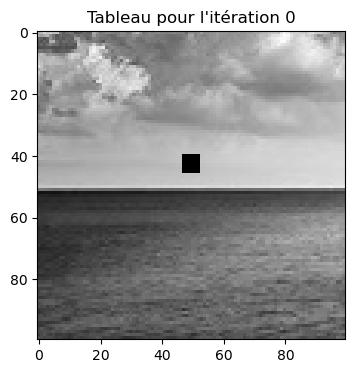

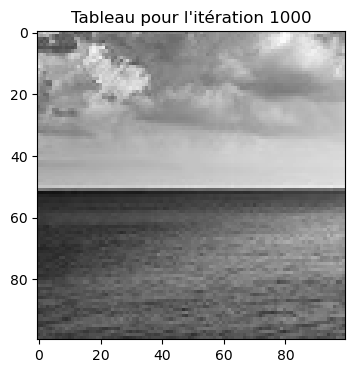

In [96]:
hauteur = 100
largeur = 100
ligne_min, ligne_max = 40, 46
col_min, col_max = 47, 53
lst_trait = indices_zone(hauteur, largeur, ligne_min, ligne_max, col_min, col_max)
afficher_traitement_v2('./img_trou_1.png', 1000, delta_t, h, 1, lst_trait, [0, 1000], (4, 4))

La zone manquante à bien été corrigée. Cette méthode présente des limites, si on souhaite corriger une zone entourée de fortes variations d'intensité ou une zone trop grande, elle va moins bien marcher :

Nom du fichier à traiter : ./img_trou_2.png
Taille de l'image 2D = 100 * 100
Taille de U_0 (image aplatie) = 10000


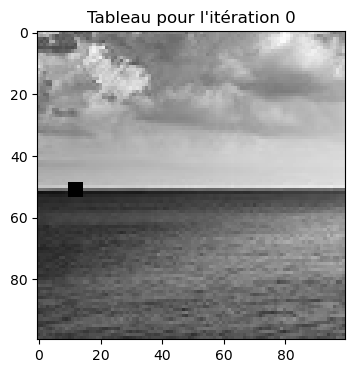

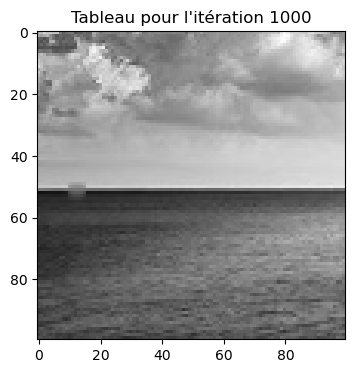

In [98]:
hauteur = 100
largeur = 100
ligne_min, ligne_max = 49, 54
col_min, col_max = 10, 15
lst_trait = indices_zone(hauteur, largeur, ligne_min, ligne_max, col_min, col_max)
afficher_traitement_v2('./img_trou_2.png', 1000, delta_t, h, 1, lst_trait, [0, 1000], (4, 4))

Le résultat est moins satisfaisant.

# Conclusion

Nous avons vu que l'équation de la chaleur est très utile pour faire du traitement d'images. On peut la discrétiser pour un espace 2D grâce à la méthode des différences finies afin d'obtenir des sytèmes linéaires, qui sont plus simple à résoudre en informatique. La partie informatique sert à visualiser cette simulation sur des phénomènes de diffusion thermique et de traitement d'image (flou, correction de zones manquantes ou correction du bruit).